In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [31]:
# 1

np.random.seed(42)  # for reproducibility

N = 1000

# Generate x1, x2, and x3
x1 = np.random.normal(0, 1, N)
x2 = x1 + np.random.normal(0, 3, N)
x3 = 2 * x1 + x2


In [32]:
# 2 

# Create the data matrix
data_matrix = np.vstack((x1, x2, x3)).T

# Calculate the covariance matrix
cov_matrix = np.cov(data_matrix, rowvar=False)

# Perform eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("Eigenvalues: ", eigenvalues)
print("----------------------------------------------------------------------")
print("Eigenvectors: ", eigenvectors)


Eigenvalues:  [ 2.54913514e+01 -1.08597603e-15  2.01759743e+00]
----------------------------------------------------------------------
Eigenvectors:  [[-0.11044427 -0.81649658  0.56668809]
 [-0.58360407 -0.40824829 -0.70195415]
 [-0.80449261  0.40824829  0.43142204]]


In [33]:
#3

# Perform SVD
U, S, Vt = np.linalg.svd(data_matrix, full_matrices=False)

# Eigenvectors are the columns of Vt, and eigenvalues are the squares of singular values
eigenvectors_svd = Vt.T
eigenvalues_svd = S**2


print("Eigenvalues: ", eigenvalues_svd)
print("----------------------------------------------------------------------")
print("Eigenvectors: ", eigenvectors_svd)
print("----------------------------------------------------------------------")
# Check if the results are the same
print("Difference between eigenvalues and eigenvalues_svd", eigenvalues- eigenvalues_svd)
print("----------------------------------------------------------------------")
print("Difference between eigenvectors and eigenvectors_svd", eigenvectors - eigenvectors_svd)


Eigenvalues:  [2.55919324e+04 2.01680418e+03 9.12823800e-28]
----------------------------------------------------------------------
Eigenvectors:  [[-0.11014482 -0.56674637 -0.81649658]
 [-0.58397489  0.70164568 -0.40824829]
 [-0.80426453 -0.43184707  0.40824829]]
----------------------------------------------------------------------
Difference between eigenvalues and eigenvalues_svd [-2.55664411e+04 -2.01680418e+03  2.01759743e+00]
----------------------------------------------------------------------
Difference between eigenvectors and eigenvectors_svd [[-2.99452114e-04 -2.49750207e-01  1.38318468e+00]
 [ 3.70829499e-04 -1.10989397e+00 -2.93705859e-01]
 [-2.28074730e-04  8.40095361e-01  2.31737481e-02]]


In [34]:
#4

# Calculate explained variance ratio
explained_var_ratio = eigenvalues / np.sum(eigenvalues)

print(explained_var_ratio)

# Cumulative explained variance
cumulative_var_ratio = np.cumsum(explained_var_ratio)

# Find the number of components to retain 99% of the variability
num_components = np.argmax(cumulative_var_ratio >= 0.99) + 1

#5
# Project the data onto the selected number of components
pca_result = np.dot(data_matrix, eigenvectors[:, :num_components])
print (pca_result)

[ 9.26656687e-01 -3.94771911e-17  7.33433126e-02]
[[-7.37087411e+00  1.97904184e-15 -5.60020009e-01]
 [-3.42078289e+00  1.09777739e-15 -9.10677641e-01]
 [-2.26102723e+00  3.29208576e-16  7.02275265e-01]
 ...
 [ 1.68094585e+00 -9.70087111e-16  1.45846315e+00]
 [ 2.45401179e+00 -3.05098819e-16 -5.29651933e-01]
 [ 1.32267468e+00 -7.94546244e-16  1.26818373e+00]]


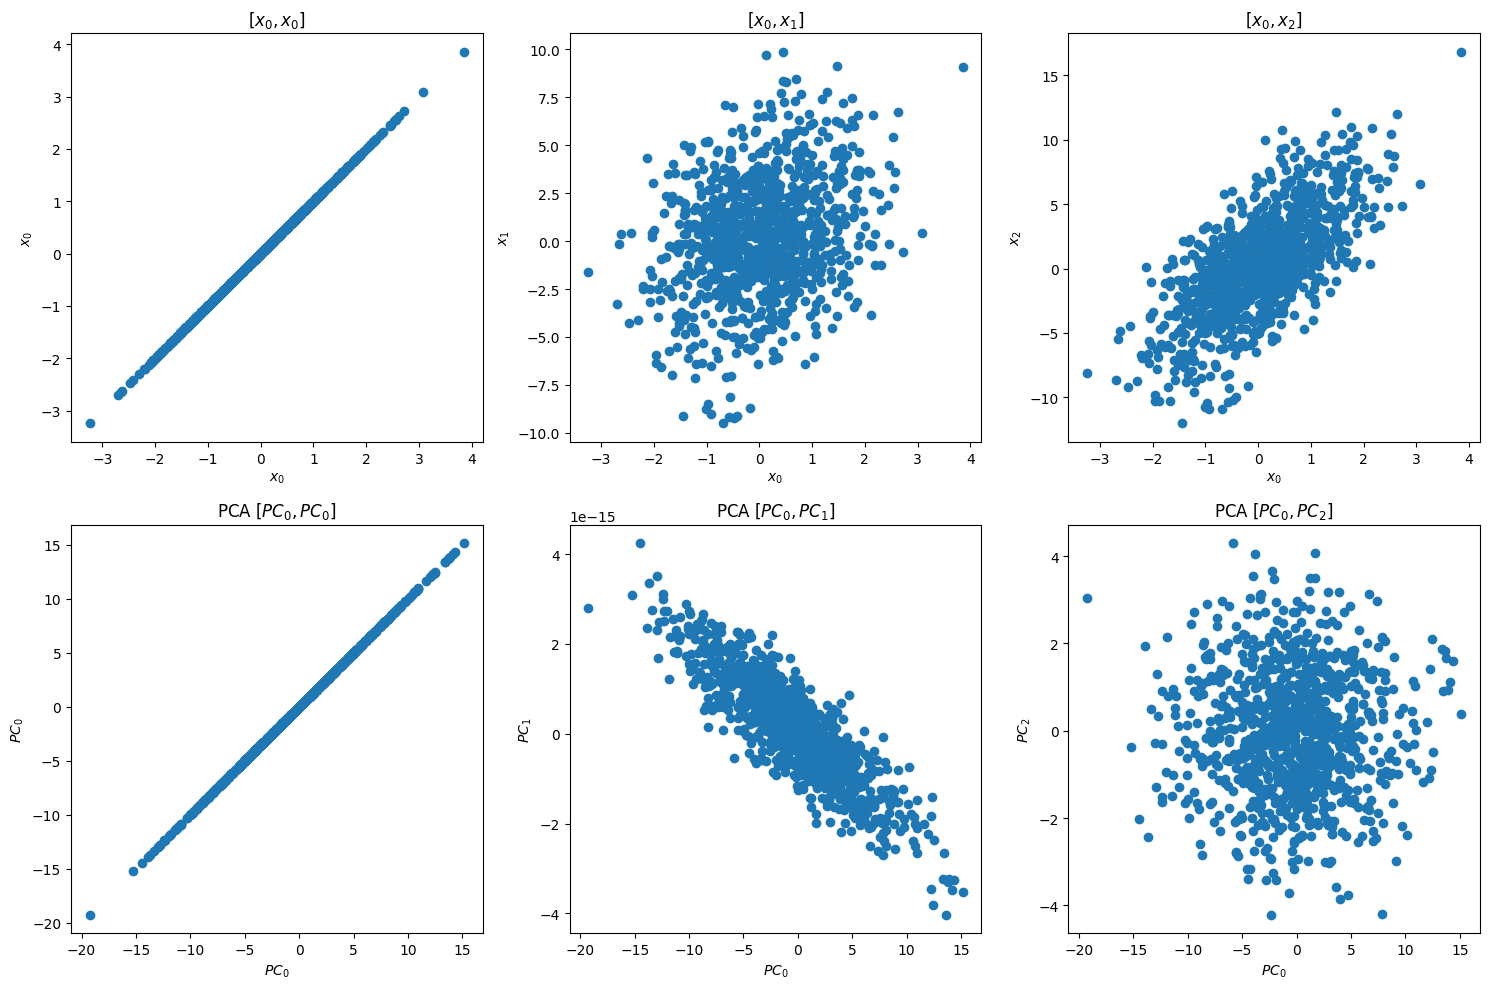

In [35]:
#6
# Original basis scatter plots
plt.figure(figsize=(15, 10))

# Scatter plots in the original basis
for i in range(3):
    plt.subplot(2, 3, i + 1)
    plt.scatter(data_matrix[:, 0], data_matrix[:, i])
    plt.title(f'$[x_0, x_{i}]$')
    plt.xlabel('$x_0$')
    plt.ylabel(f'$x_{i}$')

# Scatter plots in the new basis
for i in range(3):
    plt.subplot(2, 3, i + 4)
    plt.scatter(pca_result[:, 0], pca_result[:, i])
    plt.title(f'PCA $[PC_0, PC_{i}]$')
    plt.xlabel('$PC_0$')
    plt.ylabel(f'$PC_{i}$')

plt.tight_layout()
plt.show()


2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

IndexError: index 2 is out of bounds for axis 1 with size 2

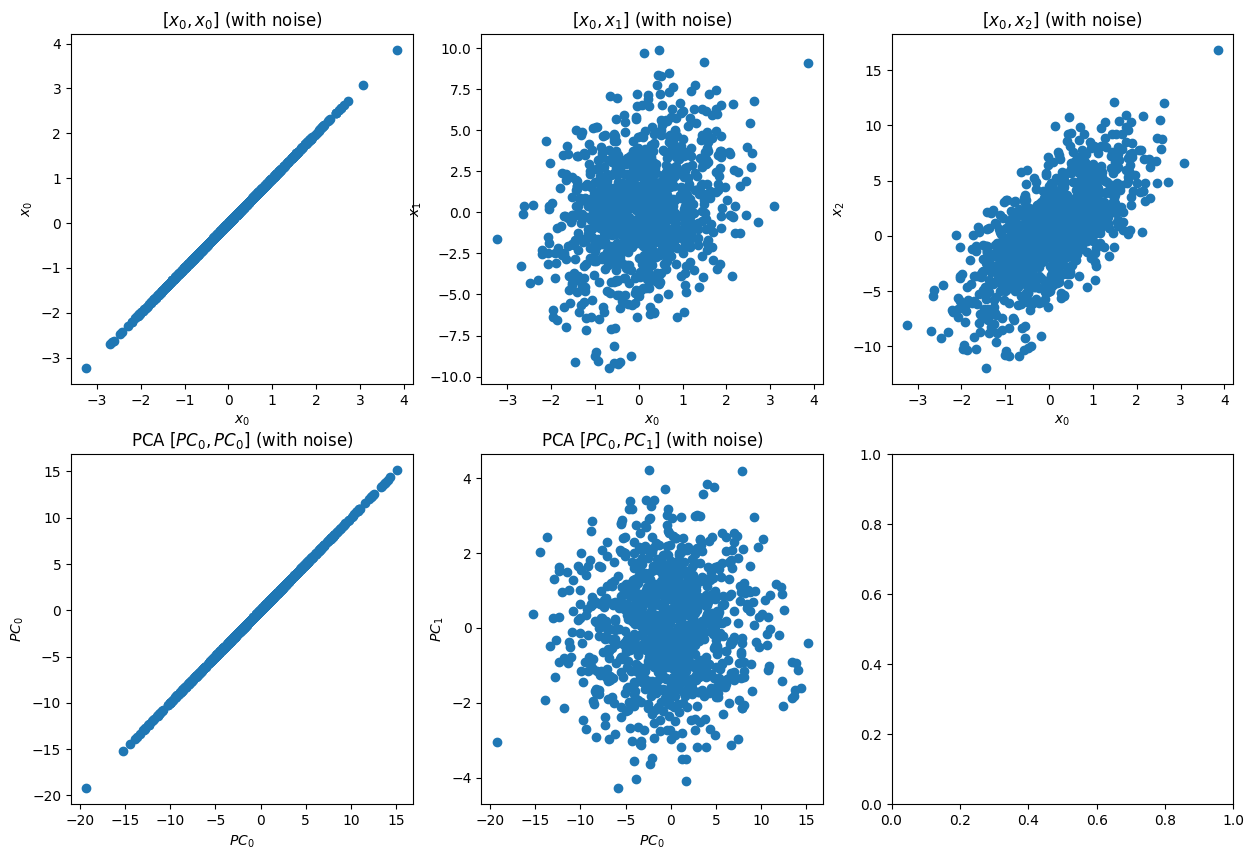

In [36]:
# Generate uncorrelated random noise variables
num_noise_variables = 10
noise_std = 0.05  # Smaller standard deviation

# Add noise to the dataset
noise = np.random.normal(0, noise_std, size=(N, num_noise_variables))
data_matrix_with_noise = np.hstack((data_matrix, noise))

# Calculate the covariance matrix of the extended dataset
cov_matrix_with_noise = np.cov(data_matrix_with_noise, rowvar=False)

# Perform eigendecomposition
eigenvalues_with_noise, eigenvectors_with_noise = np.linalg.eig(cov_matrix_with_noise)

# Calculate explained variance ratio for the extended dataset
explained_var_ratio_with_noise = eigenvalues_with_noise / np.sum(eigenvalues_with_noise)

# Cumulative explained variance
cumulative_var_ratio_with_noise = np.cumsum(explained_var_ratio_with_noise)

# Find the number of components to retain 99% of the variability
num_components_with_noise = np.argmax(cumulative_var_ratio_with_noise >= 0.99) + 1

# Project the extended data onto the selected number of components
pca_result_with_noise = np.dot(data_matrix_with_noise, eigenvectors_with_noise[:, :num_components_with_noise])

# Plot the results for the extended dataset
plt.figure(figsize=(15, 10))

# Scatter plots in the original basis
for i in range(3):
    plt.subplot(2, 3, i + 1)
    plt.scatter(data_matrix_with_noise[:, 0], data_matrix_with_noise[:, i])
    plt.title(f'$[x_0, x_{i}]$ (with noise)')
    plt.xlabel('$x_0$')
    plt.ylabel(f'$x_{i}$')

# Scatter plots in the new basis
for i in range(3):
    plt.subplot(2, 3, i + 4)
    plt.scatter(pca_result_with_noise[:, 0], pca_result_with_noise[:, i])
    plt.title(f'PCA $[PC_0, PC_{i}]$ (with noise)')
    plt.xlabel('$PC_0$')
    plt.ylabel(f'$PC_{i}$')

plt.tight_layout()
plt.show()


3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [ ]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

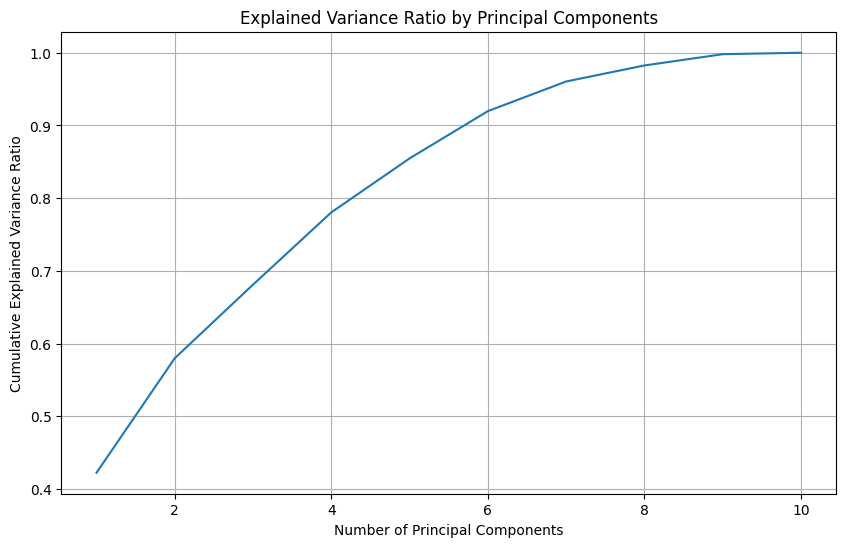

In [39]:
# Load the dataset using the provided column names and class labels
column_names = [
    "fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym",
    "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"
]
file_path = "data/magic04.data"
magic_data = pd.read_csv(file_path, names=column_names)

# Separate features and target variable
X = magic_data.drop("class", axis=1)
y = magic_data["class"]

# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(X_standardized)

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.grid(True)
plt.show()